# Explore the results of the given examples

### Import the required packages and disable some expected warnings

In [3]:
pip install morphio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install neurots

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install neurom

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import logging

from morphio import set_ignored_warning
from morphio import Warning
from neurom import load_morphology
from neurom.view import plotly_impl

logging.getLogger("neurots.generate.grower").disabled = True
set_ignored_warning([Warning.zero_diameter], True)

### Run the example extract_synthesis_inputs.py and plot the result

In [ ]:
# Create 100 Neurons from C220197A-P2 https://neuromorpho.org/KeywordResult.jsp?count=1&keywords=%22C220197A-P2%22

In [2]:
import neurots
from neurots import extract_input
import json


def extract_distr_and_param(output_dir, data_dir):
    # Generate distribution from directory of neurons
    distr = extract_input.distributions(
        data_dir / "neurons", feature="path_distances", diameter_model="default"
    )

    # Save distributions in a json file
    with open(output_dir / f"bio612/test_distr.json", "w", encoding="utf-8") as f:
        json.dump(distr, f, sort_keys=True, indent=2)

    # Generate default parameters for topological synthesis of basal dendrites
    params = extract_input.parameters(feature="path_distances", method="tmd")

    # Save parameters in a json file
    with open(output_dir / f"bio612/test_params.json", "w", encoding="utf-8") as f:
        json.dump(params, f, sort_keys=True, indent=2)

In [3]:
# extract_synthesis_inputs.py
def generate_cell(input_name, output_dir, output_name, nb_cells):
    # Re-load data from saved distributions
    with open(f"{input_name}_distr.json", "r", encoding="utf-8") as F:
        distr = json.load(F)

    # Re-load data from saved parameters
    with open(f"{input_name}_params.json", "r", encoding="utf-8") as F:
        params = json.load(F)

    for i in range(nb_cells):
        # Initialize a neuron
        N = neurots.NeuronGrower(input_distributions=distr, input_parameters=params)

        # Grow the neuron
        neuron = N.grow()

        # Export the synthesized cell
        neuron.write(f"{output_name}_{i}.swc")
        print(f"{output_name}_{i}.swc")

# Load file names

# Synthesize normal and pathological cells

In [29]:
from pathlib import Path
import os 

type_  = 'L4_TPC'
folder = f"Cortical_morphologies/{type_}"
filenames = os.listdir(folder)
filenames =[file.split('.')[0] for file in filenames if ".asc" in file]

folder = ['synthetic', 'shrunk_75']
for file in filenames:
    for fold in folder:
        if type_ == 'L4_UPC':
            nrep = 4
        else:
            nrep = 3
        if fold == 'shrunk_75':
            suffix = fold + '_'
            output_dir = Path(f"Cortical_morphologies/{fold}_synthetic_{type_}")
            input_name = output_dir / f'shrunk_0.75_{file}'
            output_name = output_dir / f"shrunk_0.75_synthetic_{file}"
        else:
            suffix = ''
            output_dir  = Path(f"Cortical_morphologies/{fold}_{type_}")
            input_name  = output_dir / file
            output_name = output_dir / f"synthetic_{file}"
        generate_cell(input_name, output_dir, output_name, nrep)

Cortical_morphologies/synthetic_L4_TPC/synthetic_rp120604_P_3_idA_0.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_rp120604_P_3_idA_1.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_rp120604_P_3_idA_2.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_rp120604_P_3_idA_0.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_rp120604_P_3_idA_1.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_rp120604_P_3_idA_2.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_rp120722_L4-1_idC_0.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_rp120722_L4-1_idC_1.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_rp120722_L4-1_idC_2.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_rp120722_L4-1_idC_0.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_rp120722_L4-1_idC_1.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_rp120722_L4-1_idC_2.sw

Selected step size 1.000000 is too big for bars of size 0.884589


Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_rp120509_P-1_idA_2.swc


Selected step size 1.000000 is too big for bars of size 0.884589


Cortical_morphologies/synthetic_L4_TPC/synthetic_mtC050800E_idD_0.swc


Selected step size 1.000000 is too big for bars of size 0.884589


Cortical_morphologies/synthetic_L4_TPC/synthetic_mtC050800E_idD_1.swc


Selected step size 1.000000 is too big for bars of size 0.884589


Cortical_morphologies/synthetic_L4_TPC/synthetic_mtC050800E_idD_2.swc


Selected step size 1.000000 is too big for bars of size 0.884589


Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_mtC050800E_idD_0.swc


Selected step size 1.000000 is too big for bars of size 0.884589


Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_mtC050800E_idD_1.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_mtC050800E_idD_2.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_C200897C-P2_0.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_C200897C-P2_1.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_C200897C-P2_2.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_C200897C-P2_0.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_C200897C-P2_1.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_C200897C-P2_2.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_vd100726B_idC_0.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_vd100726B_idC_1.swc
Cortical_morphologies/synthetic_L4_TPC/synthetic_vd100726B_idC_2.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/shrunk_0.75_synthetic_vd100726B_idC_0.swc
Cortical_morphologies/shrunk_75_synthetic_L4_TPC/s

# Load populations SSC healthy and pathological

In [69]:
import numpy as np 
import tmd
import matplotlib.pyplot as plt

def persistent_diagram_synth_vs_reco(path_synth_health, path_synth_path, type_, feature='radial_distances'):
    
    # Synthesized neurons
    points_all = np.empty((0, 2))
    for path in path_synth_health:
        neuron = tmd.io.load_neuron_from_morphio(path)
        points = tmd.methods.get_ph_neuron(neuron, feature=feature)
        points_all = np.append(points_all, np.array(points), axis=0)
    points_all = points_all.reshape(2,-1)
    z = gaussian_kde(points_all)(points_all)

    fig, axs = plt.subplots(1,2, figsize=(15,5))
    axs[0].scatter(points_all[0, :], points_all[1, :], c=z)
    axs[0].set_xlabel('Final radial distance from soma (um)')
    axs[0].set_ylabel('Initial radial distance from soma (um)')
    axs[0].set_title('Synthesized healthy ' + type_)

    # Synthesized neurons
    points_all = np.empty((0, 2))
    for path in path_synth_path:
        neuron = tmd.io.load_neuron_from_morphio(path)
        points = tmd.methods.get_ph_neuron(neuron, feature=feature)
        points_all = np.append(points_all, np.array(points), axis=0)
    points_all = points_all.reshape(2,-1)
    z = gaussian_kde(points_all)(points_all)
    axs[1].scatter(points_all[0, :], points_all[1, :], c=z)
    axs[1].set_title('Synthesized pathological ' + type_)
    axs[1].set_xlabel('Final radial distance from soma (um)')
    axs[1].set_ylabel('Initial radial distance from soma (um)')


40
40
40
40
40
40


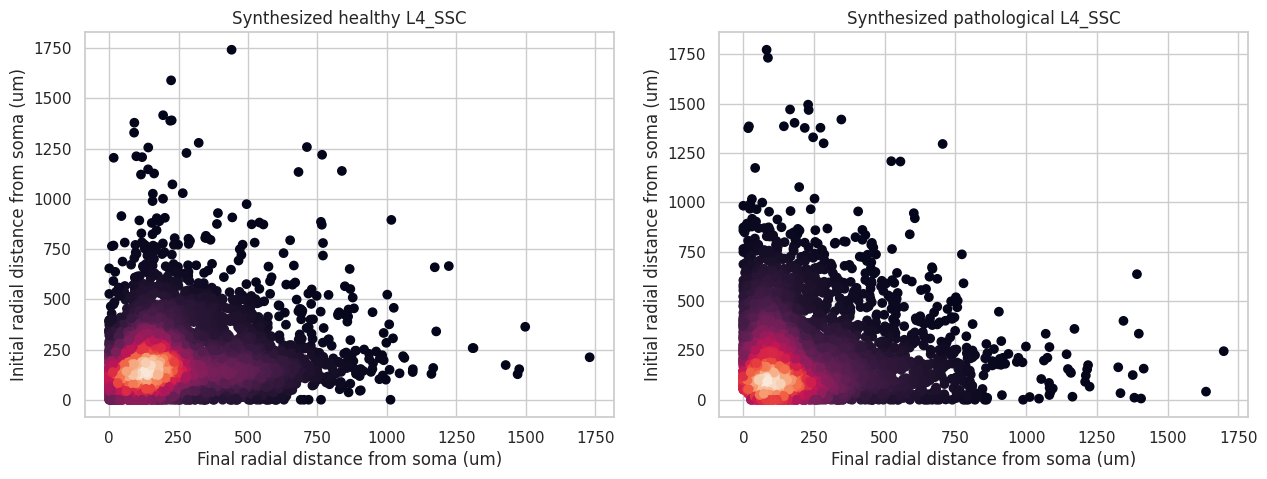

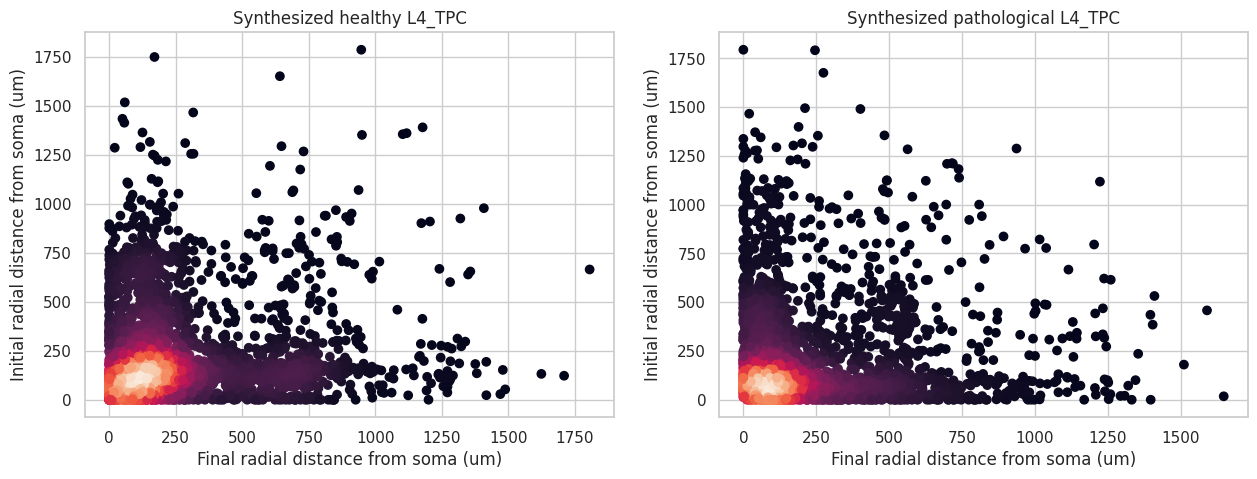

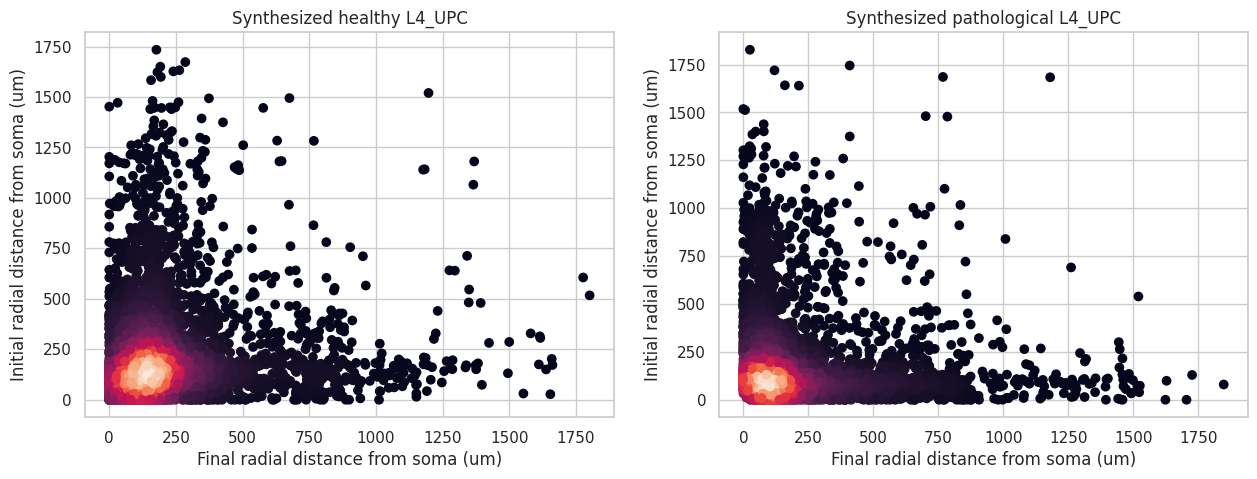

In [71]:
from scipy.stats import gaussian_kde

neuron_type = ['L4_SSC', 'L4_TPC', 'L4_UPC']

for type_ in neuron_type:
    folder = f"Cortical_morphologies/synthetic_{type_}"
    path_synth_health = os.listdir(folder)
    path_synth_health =[f"{folder}/{file}" for file in path_synth_health if ".swc" in file]
    
    print(len(path_synth_health))
    
    folder = f"Cortical_morphologies/shrunk_75_synthetic_{type_}"
    path_synth_path = os.listdir(folder)
    path_synth_path =[f"{folder}/{file}" for file in path_synth_path if ".swc" in file]

    print(len(path_synth_path))
    persistent_diagram_synth_vs_reco(path_synth_health, path_synth_path, type_)

In [9]:
import os
import numpy as np
import morphio
from neurom.core.morphology import Morphology
from neurom.core.population import Population
from neurom.io.utils import load_morphologies
from collections import defaultdict
import neurom as nm
morphio.set_maximum_warnings(0)

# Neurite types of interest
NEURITES_ = (nm.NeuriteType.apical_dendrite,
             nm.NeuriteType.basal_dendrite)


# Features of interest
FEATURES = ('number_of_neurites', 
            'number_of_sections', 
            'section_term_lengths', 
            'number_of_bifurcations',
            'section_lengths',
            'section_tortuosity', 
            'section_radial_distances',
            'section_path_distances',
            'section_branch_orders', 
            'local_bifurcation_angles')

def load_neurite_features_pop(filepath):
    """Unpack relevant data into megadict."""
    stuff = defaultdict(lambda: defaultdict(list))
    morphs = nm.load_morphologies(filepath)
    # unpack data into arrays
    for t in NEURITES_:
        for feat in FEATURES:
            stuff[feat][str(t).split('.')[1]].extend(
                nm.get(feat, morphs, neurite_type=t)
            )
    return stuff


type_ = 'L4_SSC'
folder = f"Cortical_morphologies/synthetic_{type_}"
path_synth_health = os.listdir(folder)
path_synth_health =[f"{folder}/{file}" for file in path_synth_health if ".swc" in file]

folder = f"Cortical_morphologies/shrunk_75_synthetic_{type_}"
path_synth_path = os.listdir(folder)
path_synth_path =[f"{folder}/{file}" for file in path_synth_path if ".swc" in file]

features_synth_health = load_neurite_features_pop(path_synth_health)
features_synth_patho  = load_neurite_features_pop(path_synth_path)

/tmp/ipykernel_327/1316572977.py:14: RuntimeWarning: invalid value encountered in double_scalars
  pd_synth_health.loc[row, col] = (pd_synth_health.loc[row, col][0] - med)/std
/tmp/ipykernel_327/1316572977.py:15: RuntimeWarning: invalid value encountered in double_scalars
  pd_synth_patho.loc[row, col]  = (pd_synth_patho.loc[row, col][0]  - med)/std
/tmp/ipykernel_327/1316572977.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd_all = pd_all.append(pd_synth_patho)


[Text(0.5, 0, 'absolute values'), Text(0, 0.5, ''), Text(0.5, 1.0, 'L4_TPC')]

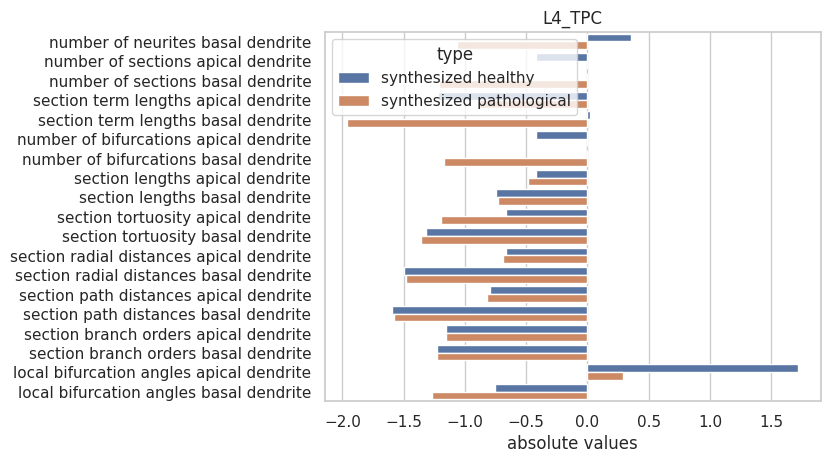

In [102]:
import pandas as pd 
import seaborn as sns

pd_synth_health = pd.DataFrame(features_synth_health)
pd_synth_patho  = pd.DataFrame(features_synth_patho)
if type_ == 'L4_SSC':
    pd_synth_patho  = pd_synth_patho.drop('apical_dendrite')
    pd_synth_health = pd_synth_health.drop('apical_dendrite')
    
for row in list(pd_synth_health.index):
    for col in  list(pd_synth_health):
        med = np.median(pd_synth_health.loc[row, col])
        std = np.std(pd_synth_health.loc[row, col])
        pd_synth_health.loc[row, col] = (pd_synth_health.loc[row, col][0] - med)/std
        pd_synth_patho.loc[row, col]  = (pd_synth_patho.loc[row, col][0]  - med)/std

pd_synth_health = pd_synth_health.unstack()
pd_synth_health.index = pd_synth_health.index.map('_'.join)
pd_synth_health.index = pd_synth_health.index.str.split('_')
pd_synth_health.index = pd_synth_health.index.map(' '.join)
pd_synth_health = pd.DataFrame(pd_synth_health)
pd_synth_health['type'] = ['synthesized healthy'] * len(pd_synth_health.index)
pd_synth_health = pd_synth_health.rename({0: "signal"}, axis='columns')

pd_synth_patho = pd_synth_patho.unstack()
pd_synth_patho.index = pd_synth_patho.index.map('_'.join)
pd_synth_patho.index = pd_synth_patho.index.str.split('_')
pd_synth_patho.index = pd_synth_patho.index.map(' '.join)
pd_synth_patho = pd.DataFrame(pd_synth_patho)
pd_synth_patho['type']  = ['synthesized pathological'] * len(pd_synth_patho.index)
pd_synth_patho = pd_synth_patho.rename({0: "signal"}, axis='columns')

pd_all = pd_synth_health
pd_all = pd_all.append(pd_synth_patho)

pd_all = pd_all.reset_index()
pd_all.to_csv(f'Cortical_morphologies/{type_}_features.csv', index=False)

pd_all = pd.read_csv(f'Cortical_morphologies/{type_}_features.csv')

ax = sns.barplot(data=pd_all.dropna(), x="signal", y='index', hue='type')
ax.set(xlabel='absolute values', ylabel='', title=type_)

In [52]:
import os
import numpy as np
import morphio
from neurom.core.morphology import Morphology
from neurom.core.population import Population
from neurom.io.utils import load_morphologies
from collections import defaultdict
import neurom as nm
morphio.set_maximum_warnings(0)

# Neurite types of interest
NEURITES_ = (nm.NeuriteType.apical_dendrite,
             nm.NeuriteType.basal_dendrite)


# Features of interest
FEATURES = ('number_of_neurites', 
            'number_of_sections', 
            'section_term_lengths', 
            'number_of_bifurcations',
            'section_lengths',
            'section_tortuosity', 
            'section_radial_distances',
            'section_path_distances',
            'section_branch_orders', 
            'local_bifurcation_angles')

def load_neurite_features_pop(filepath):
    """Unpack relevant data into megadict."""
    stuff = defaultdict(lambda: defaultdict(list))
    morphs = nm.load_morphologies(filepath)
    # unpack data into arrays
    for t in NEURITES_:
        for feat in FEATURES:
            stuff[feat][str(t).split('.')[1]].extend(
                nm.get(feat, morphs, neurite_type=t)
            )
    return stuff


groups = ['L4_SSC', 'L4_UPC', 'L4_TPC']
id_ = 0
pd_all = pd.DataFrame()
for group in groups:
    print(group)
    
    folder = f"Cortical_morphologies/synthetic_{group}"
    path_synth_health = os.listdir(folder)
    path_synth_health =[f"{folder}/{file}" for file in path_synth_health if ".swc" in file]

    folder = f"Cortical_morphologies/shrunk_75_synthetic_{group}"
    path_synth_patho = os.listdir(folder)
    path_synth_patho =[f"{folder}/{file}" for file in path_synth_patho if ".swc" in file]

    for i, path in enumerate(path_synth_health):
        features_synth_health = load_neurite_features_pop(path_synth_health[i])
        pd_synth_health = pd.DataFrame(features_synth_health)
        
        features_synth_patho = load_neurite_features_pop(path_synth_patho[i])
        pd_synth_patho = pd.DataFrame(features_synth_patho)
        
        if group == 'L4_SSC':
            pd_synth_patho  = pd_synth_patho.drop('apical_dendrite')
            pd_synth_health = pd_synth_health.drop('apical_dendrite')
        
        pd_synth_health = pd_synth_health.unstack()
        pd_synth_health.index = pd_synth_health.index.map('_'.join)
        pd_synth_health.index = pd_synth_health.index.str.split('_')
        pd_synth_health.index = pd_synth_health.index.map(' '.join)
        pd_synth_health = pd.DataFrame(pd_synth_health)
        pd_synth_health = pd_synth_health.reset_index()
        pd_synth_health['type']  = ['synthesized healthy'] * len(pd_synth_health.index)
        pd_synth_health['id']    = [id_] * len(pd_synth_health.index)
        id_ = id_ + 1
        pd_synth_health['group'] = [group] * len(pd_synth_health.index)
        pd_synth_health = pd_synth_health.rename({0: "signal"}, axis='columns')
        pd_synth_health = pd_synth_health.explode('signal')
        pd_synth_health['signal'] = pd_synth_health['signal'].astype(float)

        
        pd_synth_patho = pd_synth_patho.unstack()
        pd_synth_patho.index = pd_synth_patho.index.map('_'.join)
        pd_synth_patho.index = pd_synth_patho.index.str.split('_')
        pd_synth_patho.index = pd_synth_patho.index.map(' '.join)
        pd_synth_patho = pd.DataFrame(pd_synth_patho)
        pd_synth_patho = pd_synth_patho.reset_index()
        pd_synth_patho['type']  = ['synthesized pathological'] * len(pd_synth_patho.index)
        pd_synth_patho['id']    = [id_] * len(pd_synth_patho.index)
        id_ = id_ + 1
        pd_synth_patho['group'] = [group] * len(pd_synth_patho.index)
        pd_synth_patho = pd_synth_patho.rename({0: "signal"}, axis='columns')
        pd_synth_patho = pd_synth_patho.explode('signal')
        pd_synth_patho['signal'] = pd_synth_patho['signal'].astype(float)

        pd_all = pd.concat([pd_all, pd_synth_health, pd_synth_patho])
        pd_all['neurite'] = ['basal'] * len(pd_all.index)
        pd_all.loc[pd_all['index'].str.contains('apical'), 'neurite'] = ['apical'] * len(pd_all.loc[pd_all['index'].str.contains('apical'), 'neurite'])

pd_all['index'] = pd_all['index'].str.split('_')
pd_all['index'] = pd_all['index'].map(' '.join)

a = pd_all['index'].str.split().values
a = list(a)
for i in range(len(a)):
    a[i] = a[i][:-2]
    a[i] = ' '.join(a[i])
pd_all['index'] = a

display(pd_all)
pd_all.to_csv(f'Cortical_morphologies/all_features.csv', index=False)

L4_SSC
L4_UPC
L4_TPC


,index,signal,type,id,group,neurite
0,number of neurites,5.000000,synthesized healthy,0,L4_SSC,basal
1,number of sections,79.000000,synthesized healthy,0,L4_SSC,basal
2,section term lengths,54.828751,synthesized healthy,0,L4_SSC,basal
2,section term lengths,127.211517,synthesized healthy,0,L4_SSC,basal
2,section term lengths,149.358826,synthesized healthy,0,L4_SSC,basal
...,...,...,...,...,...,...
19,local bifurcation angles,0.098731,synthesized pathological,239,L4_TPC,basal
19,local bifurcation angles,0.194379,synthesized pathological,239,L4_TPC,basal
19,local bifurcation angles,0.090959,synthesized pathological,239,L4_TPC,basal
19,local bifurcation angles,0.132994,synthesized pathological,239,L4_TPC,basal


<Figure size 640x480 with 0 Axes>

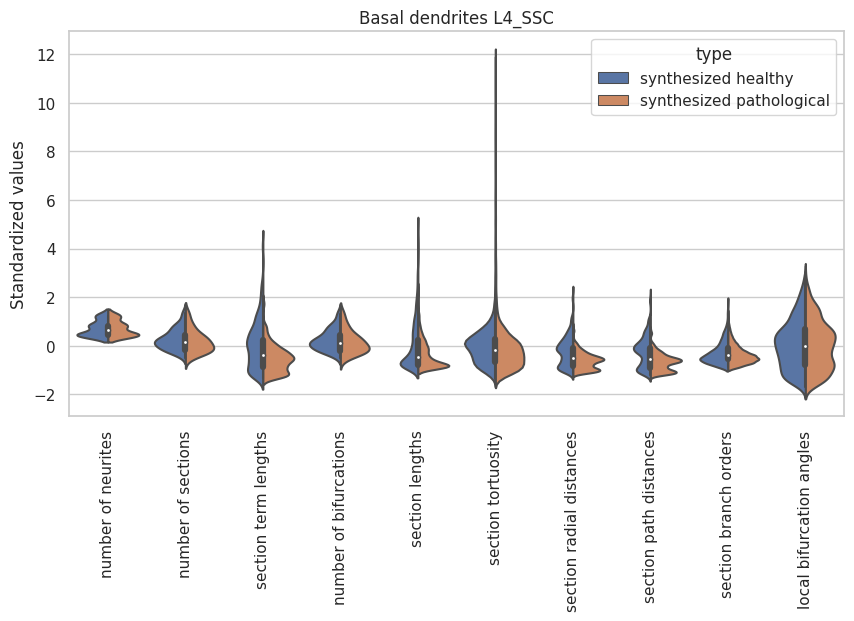

<Figure size 640x480 with 0 Axes>

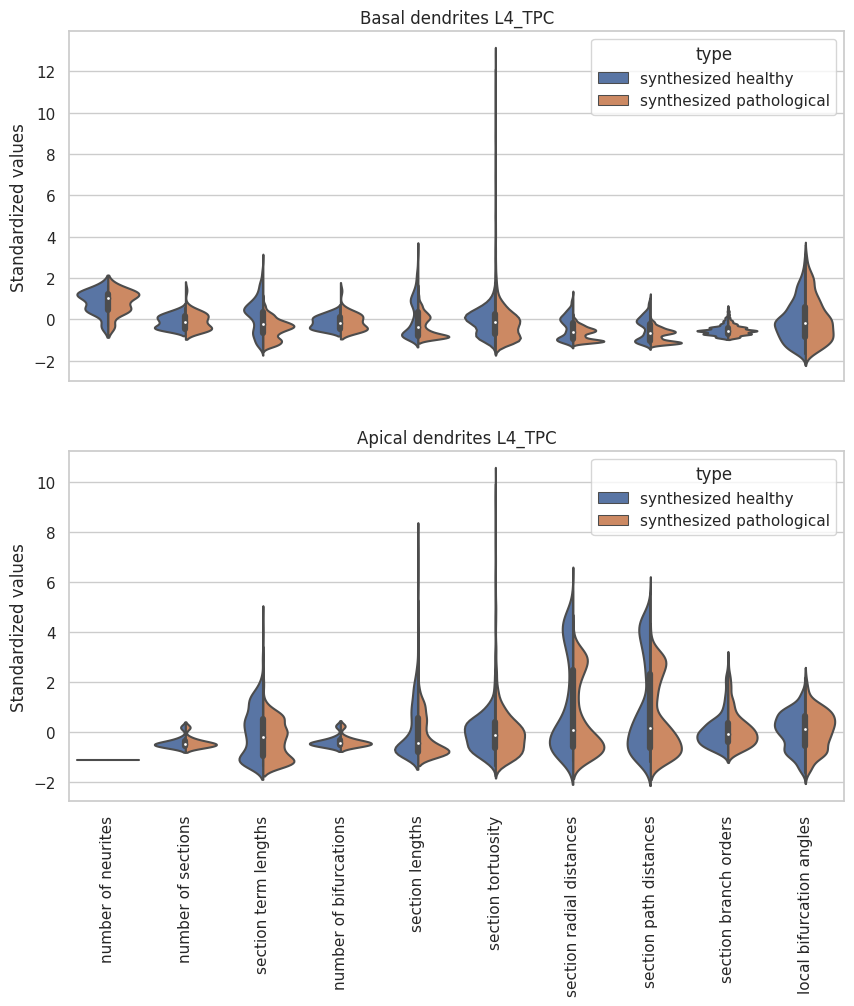

<Figure size 640x480 with 0 Axes>

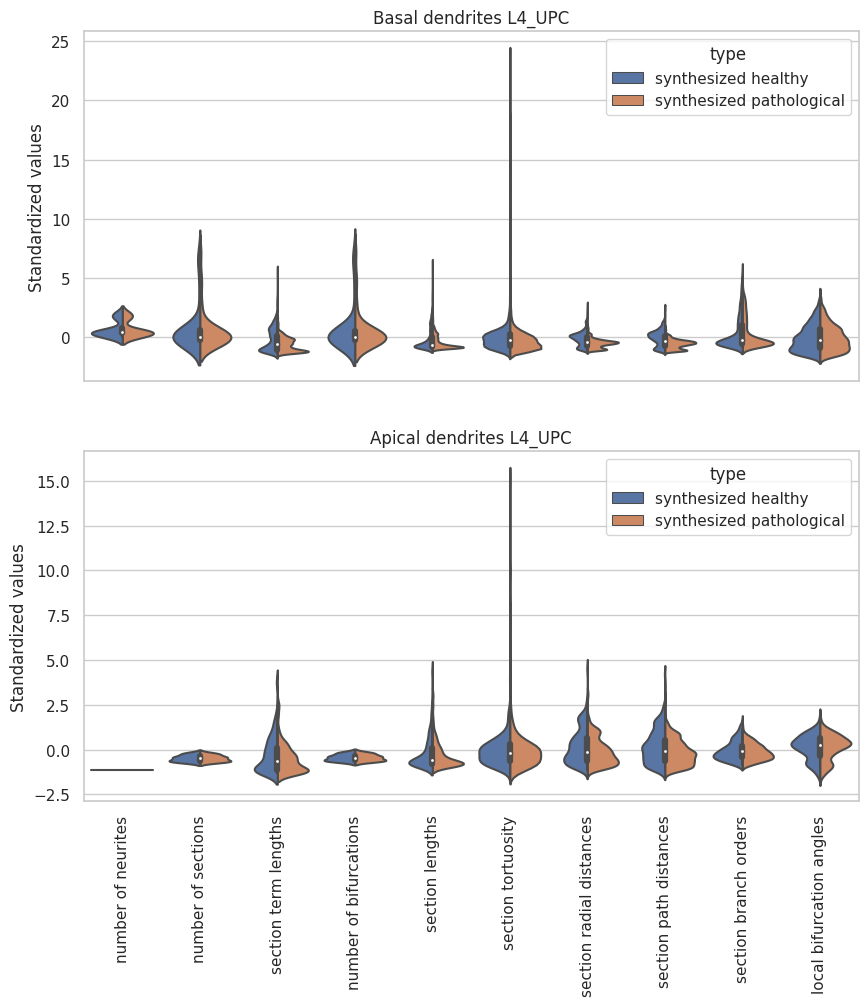

In [149]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

groups = ['L4_SSC', 'L4_TPC', 'L4_UPC']
pd_all = pd.read_csv(f'Cortical_morphologies/all_features.csv')


# Standardise
healthy_data = pd_all[pd_all['type'] == 'synthesized healthy']

# Group the healthy data by index and calculate the standard deviation
std  = healthy_data.groupby('index')['signal'].std()
mean = healthy_data.groupby('index')['signal'].mean()

# Divide the values by the standard deviation
pd_all['normalized'] = (pd_all['signal']-pd_all['index'].map(mean)) / pd_all['index'].map(std)

for group in groups:
    plt.figure()
    if not group == 'L4_SSC':
        fig, axs = plt.subplots(2, 1, figsize=(10,10))
    else:
        plt.figure(figsize=(10,5))
        sns.set(style = 'whitegrid')
        sns.violinplot(data=pd_all[(pd_all['neurite']=='basal') & (pd_all['group']==group)], x='index', y='normalized', hue="type", split=True)
        plt.xticks(rotation=90)
        plt.xlabel('')
        plt.ylabel('Standardized values')
        plt.title(f'Basal dendrites {group}')


    if not group == 'L4_SSC':
        sns.set(style = 'whitegrid')
        sns.violinplot(ax = axs[0], data=pd_all[(pd_all['neurite']=='basal') & (pd_all['group']==group)], x='index', y='normalized', hue="type", split=True)
        axs[0].set_xticks([])
        axs[0].set(xlabel='', ylabel='Standardized values', title=f'Basal dendrites {group}')

        sns.violinplot(ax= axs[1], data=pd_all[(pd_all['neurite']=='apical') & (pd_all['group']==group)], x='index', y='normalized', hue="type", split=True)
        plt.xticks(rotation=90)
        axs[1].set(xlabel='', ylabel='Standardized values',title=f'Apical dendrites {group}')


% decrease in length: 0.4301963863385611
% decrease in length: 0.3742965608141388
% decrease in length: 0.37148308182050116


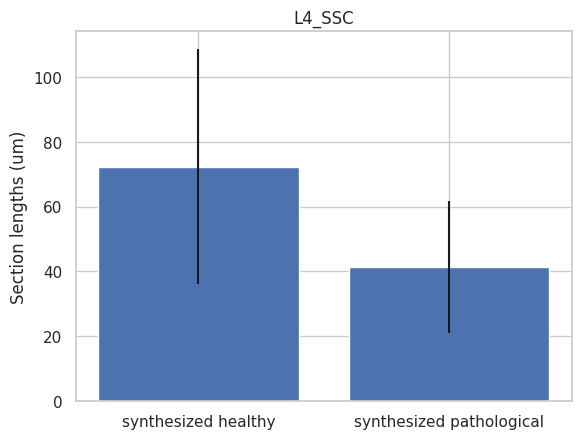

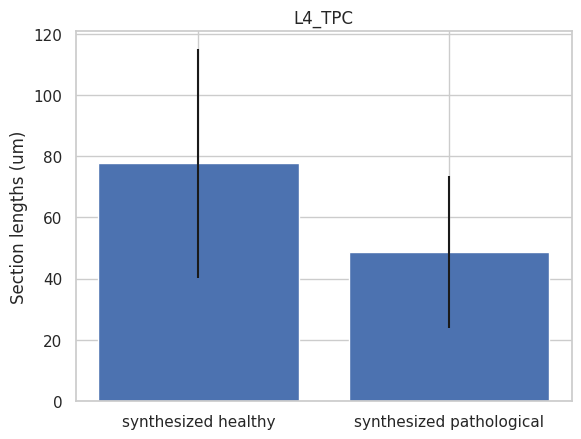

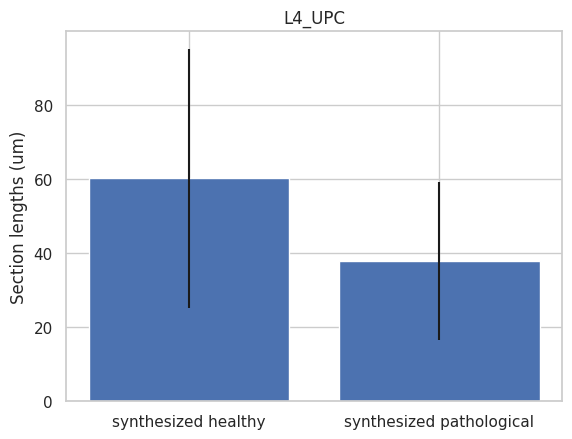

In [198]:
means = pd_all.groupby(['group', 'index', 'type']).mean()
stds = pd_all.groupby(['group', 'index', 'type']).std()

groups = ['L4_SSC', 'L4_TPC', 'L4_UPC']
types  = ['synthesized healthy', 'synthesized pathological']
for group in groups:
    # Set up the plot
    plt.figure()
    mean_tmp = []
    std_tmp = []
    for i, type_ in enumerate(types):
        
        mean = means.signal.loc[(group,'section lengths', type_)]        
        std  = stds.signal.loc[(group,'section lengths', type_)]/2
        mean_tmp.append(mean)
        std_tmp.append(std)
    
    print('% decrease in length:', (mean_tmp[0] - mean_tmp[1])/mean_tmp[0])
    plt.bar([0,1], mean_tmp, yerr=std_tmp, align='center')
    plt.xticks([0,1], types)
    plt.ylabel('Section lengths (um)')
    plt.title(group)
